# ECON 490: Graphs (9)

## Prerequisites

1. Load data and packages.
2. Create variables and objects.
3. Have some familiarity with the syntax of commands. 

## Learning Outcomes 

1. Identify best practices for data visualization.
2. Distinguish between the main forms of visualization using economic data: scatter plots, line plots, bar plots, and histograms.
3. Feel comfortable with the syntax of `ggplot2`, which includes the use of geometries, aesthetic layers, labeling and themes.
4. Store graphs in png or svg format.

## 9.1 General Points about Visualization

If you are familiar with Stata, you will notice that graphs in R are completely different. The most important and widely used package for data visualization in R is `ggplot2`. This package operates under the premise that every graph can be decomposed into the following layers: 

* Data : the very base of every graph, where it comes from.
* Mapping: informs graphics which variables are going to be part of some graphical property (e.g. column 3 of the data is going to be the dependent variable and y-axis of some graph).
* Statistics: transforms the input variables to be displayed (e.g. graphs the means of some particular columns, counts the number of observations in some category).
* Scales: indicates the relationship between variables and properties (e.g. we want to associate different colours with different values of a region variable). 
* Geometries: a key layer of the  graph structure. The geometry indicates the general aesthetic of the graph (e.g. a line, a polygon, etc). 
* Facets: this can be used to split data into different sub-plots.
* Coordinates: dictates the positioning of variables. It thinks of the world as an X and Y axis by default, but more generally there can be more complicated structures (e.g. cartography!).
* Theme: deals with other graphic information that is not related to the previous parts (e.g. background colour of our graph).

In the next section, we will look at how to construct a standard graph. You will notice how `ggplot2` tries to respect the above structure when constructing graphic information. 

First, let's load in the data set that we've been using so far in these modules. Recall that this data set is simulating information for workers in the years 1982-2012 in a fake country where a training program was introduced in 2003 to boost their earnings.

Let's also clear our memory and installing/import the necessary packages below.

In [ ]:
#Clear the memory from any pre-existing objects
rm(list=ls())

# Install in our packages
install.packages("tmap")
install.packages("maps")
install.packages("mapproj")

# loading in our packages
library(tidyverse)
library(magrittr)
library(ggplot2)
library(maps)
library(mapproj)
library(tmap) 

In [ ]:
#Open the dataset 
library(haven)
library(tidyverse)
fake_data <- read_dta("../econ490-stata/fake_data.dta")  #change me!

# inspecting the data
glimpse(fake_data)

## 9.2 Types of Graphs

#### 9.2.1 Scatter plots

Scatter plots are used to demonstrate how two quantitative variables are related to one another. This plot works well when we are interested in showing relationships and groupings among variables from relatively large data sets. Below is an example of a nice scatter plot.

![Relationship of country religiosity vs wealth](https://ourworldindata.org/uploads/2013/11/GDP-vs-Religion.png)

Let's say we want to plot log earnings by year. We begin by generating a new variable for log earnings.

In [ ]:
fake_data <- fake_data %>%
        mutate(log_earnings = log(earnings)) # the log function

The purpose of a scatter plot is to observe how variables related to one another. We can now create our scatter plot.

The first step of creating any graph is to call the `ggplot` function and input the data source as well as the variables on the axes.

In [ ]:
figure <- ggplot(data = fake_data, # referencing the data we chose
                 aes(
                     x = year,  # x-axis is year
                     y = log_earnings # y-axis is avg logearnings
                 ))

We have used the data layer and the mapping layer (as part of the aesthetics). However, we need a little bit more to be able to create a visualization. We require some geometry, the elemental part of any graph!

R can use different geometries. Since the scatterplot is made of points, we apply the `geom_point` function.

In [ ]:
# This graph will take a while to compile
figure + geom_point()

This graph looks very messy! This is because we have plotted every observation, meaning there are 2 million dots in the graph. This makes it very difficult for us to observe any type of relationship. In fact this graph makes it look like wages doesn't change across time at all. 

A very useful tool when creating graphs is to filter out some parts of our data for ease of visualization. We can do that using the `filter` function.
Usually, we are interested in seeing how the *average* earning changes over time. The graph above is very messy and does not allow us to see what the average earning is.

In [ ]:
# Create a dataframe with the average wage by year
figure1_data <- fake_data %>%
                group_by(year) %>%
                summarise(mean_earnings = mean(log_earnings))

# Specify the setting in ggplot
figure1 <- ggplot(data = figure1_data, # referencing the data we want to use
                 aes(
                     x = year,  # x is year
                     y = mean_earnings # our y is avg logearnings
                 ))

# Add the points for the scatterplot
figure1 <- figure1 + geom_point()

# Show the graph
figure1

Now our graph is looking better! You can play around with different options that can be found in the [documentation](https://ggplot2.tidyverse.org/reference/). For instance, one can include labels and a theme:

In [ ]:
figure1 = figure1 + geom_point() + labs(x = "Years",
                        y = "Average Log-Earnings",
                        title = "Earnings Trends") +
                        theme(
                            text = element_text(
                                size = 20)) # increases text size: try playing around with this number!
figure1

#### 9.2.2 Line plots 
Line plots visualize trends with respect to an independent, ordered quantity (e.g., time). This plot works well when one of our variables is ordinal (time-like) or when we want to display multiple series on a common timeline.

Line plots can be generated using `geom_line()`. Below we also introduce something new, we have added options to the graph that change labels (`labs`). We add a label to the x-axis (`x="Year"`) and a label to the y-axis (`y="Log-earnings"`).

In [ ]:
# Specify data and axes
figure2 <- ggplot(data = figure1_data, # referencing the data we want to use
                 aes(
                     x = year,  # x is year
                     y = mean_earnings # our y is avg logearnings
                 ))

# Tell R the graph will be a line graph
figure2 <- figure2 + geom_line() 

# Add labels
figure2 <- figure2 + labs(x = "Year", y = "Log-earnings")
figure2

Suppose we want to look at how average earnings change over time for treated and untreated individuals.
We can create a graph that separates the two groups in two different lines. We do so by specifying a categorical variable for the argument `group` in the `aes` input of `ggplot`.
Notice that we create a character variable in our data, called *treatment*, that takes two values: 'Treated' and 'Untreated'. We further specify to R that each value of variable *treatment* should have a different color: we do so with the option `color=treatment`.
We could have used directly our variable *treated*, but R would interpret that variable as taking any value within a range rather than a variable taking only two values.

In [ ]:
# Create the data
figure3_data <- fake_data %>%
               group_by(year, treated) %>%
               summarise(mean_earnings = mean(log_earnings)) %>%
               mutate(treatment = case_when(treated == 1 ~ 'Treated', treated == 0 ~ 'Untreated'))

# Specify data and axis
figure3 <- ggplot(data = figure3_data, # referencing the data we want to use
                 aes(
                     x = year,  # x is year
                     y = mean_earnings, # our y is avg logearnings
                     group=treatment, # each line is data for one value of treatment
                     color=treatment # each value of treatment as one color
                 ))

# Tell R the graph will be a line graph
figure3 <- figure3 + geom_line() 

# Add labels
figure3 <- figure3 + labs(x = "Year", y = "Log-earnings")
figure3

#### 9.2.3 Histogram plots 

Histograms visualize the distribution of one quantitative variable. This plot works well when we are working with a discrete variable and are interested in visualizing all its possible values and how often they occur.

Let's say we want to see the distribution of the age of workers. Once again, we specify the data as one of the inputs of `ggplot`. This time we need to specify only the x-axis (which is variable *age*), as the y-axis will be given by the count of workers with that age.
In this example, we want to use histogram as a geometry, therefore we use the function `geom_histogram`.

In [ ]:
# Specify data and axes in ggplot
figure3 <- ggplot(data = fake_data, # referencing the data we chose
                 aes(x = age))      # specify axis

# Add histogram type
figure3 <- figure3 + geom_histogram()

# Show figure
figure3 

We can change the width of each bin with the option `binwidth` in function `geom_histogram`. Below we show two examples, one where each bin has width of 1 year, and another where each bin has width of 5 years.

In [ ]:
# Specify data and axes in ggplot
figure3 <- ggplot(data = fake_data, # referencing the data we chose
                 aes(x = age))      # specify axis

# Add histogram type
figure3 <- figure3 + geom_histogram(binwidth=1) # width of 1 year

# Show figure
figure3 

In [ ]:
# Specify data and axes in ggplot
figure3 <- ggplot(data = fake_data, # referencing the data we chose
                 aes(x = age))      # specify axis

# Add histogram type
figure3 <- figure3 + geom_histogram(binwidth=5) # width of 5 years

# Show figure
figure3 

#### 9.2.4 Bar plots

Bar plots visualize comparisons of amounts. They are useful when we are interested in comparing a few categories as parts of a whole or across time. *Bar plots should always start at 0. Starting bar plots at any number besides 0 is generally considered a misrepresentation of the data.*

Let's say we want to plot average earnings by region. First, we need to create the appropriate data containing average earnings for each region and use it as input in `ggplot`. In the aesthetics set in the `aes` function, set the categoric variable for the x axis (in our case, *region*) and the numeric variable in the y axis (in our case, *meanearnings*).
Finally, call the function for adding the bars: `geom_col`.

In [ ]:
# Create data for figure
figure4_data <- fake_data %>% 
              group_by(region) %>% 
              summarise(meanearnings = mean(earnings))

# Specify data and axes
figure4 <- ggplot(data = figure4_data,  
                aes(x = region,   
                    y = meanearnings)) 

# Add bars
figure4 <- figure4 + geom_col()

# Show graph
figure4

We may prefer to turn our bar plot horizontally. In the example below we do that by adding the option `coord_flip`.

In [ ]:
# Create data for figure
figure4_data <- fake_data %>% 
              group_by(region) %>% 
              summarise(meanearnings = mean(earnings))

# Specify data and axes
figure4 <- ggplot(data = figure4_data,  
                aes(x = region,   
                    y = meanearnings)) 

# Add bars
figure4 <- figure4 + geom_col()

# Turn it horizontally
figure4 <- figure4 + coord_flip()

# Show graph
figure4

## 9.3 Exporting

Once we've decided that our graph can successfully answer our economic question, we can export it from Jupyter. Once again, the ggplot package comes to our rescue with the `ggsave` command, which allows us to save a visualization using the following key arguments: `("file_name.file_format", my_plot, width = #, height = #)`.

The first part of the argument, "file_name.file_format" is where we give our graphic a descriptive name and specify which file format we want our graphic to be saved in the Jupyter workspace. If we are saving to a specific folder, we can add this before the file name with a `/` in between to separate the two (example: `"folder/file_name.file_format"`). The format we choose may depend on the context we plan to use the visualization in. Images are typically stored in either raster or vector formats. 

Raster images are represented as a 2-D grid of square pixels, each with its own color. Raster images are often compressed before being stored so they take up less space. A compressed format is "lossy" if the image cannot be perfectly re-created when loading and displaying, with the hope that the change is not noticeable. "Lossless" formats, on the other hand, allow a perfect display of the original image.

Common raster file types:

* JPEG (.jpg, .jpeg): lossy, usually used for photographs
* PNG (.png): lossless, usually used for plots/line drawings
* BMP (.bmp): lossless, raw image data, no compression (rarely used)
* TIFF (.tif, .tiff): typically lossless, no compression, used mostly in graphic arts, publishing
* GIMP: open-source software

Vector images are represented as a collection of mathematical objects (lines, surfaces, shapes, curves). When the computer displays the image, it redraws all of the elements using their mathematical formulas.

Common vector file types:

* SVG (.svg): general-purpose use
* EPS (.eps): general-purpose use (rarely used)
* Inkscape: open-source software

Raster and vector images have advantages and disadvantages. A raster image of a fixed width and height takes the same amount of space and time to load regardless of what the image shows (the one caveat is that the compression algorithms may shrink the image more or run faster for certain images). A vector image takes space and time to load depending on how complex the image is, since the computer has to draw all the elements each time it is displayed. For example, if we have a scatter plot with 1 million points stored as an SVG file, it may take our computer some time to open the image. On the upside, with vector graphics we can zoom into/scale up the image as much as we like without it looking bad, while raster images eventually start to look “pixelated".

The second part of the argument, `my_plot`, specifies which plot in our analysis we'd like to export. The last key part of the argument, `width =` and `height =` specifies the dimensions of our image. Because we've tinkered with the graph output size using options (`repr.plot.width = 15, repr.plot.height = 9`) above in our code, we'll want to use these dimensions as we export to ensure that our visualization isn't cut off by R's default saving dimensions.

For instance, we may save our very first graph as follows:

In [ ]:
# Create a dataframe with the average wage by year
figure1_data <- fake_data %>%
                group_by(year) %>%
                summarise(mean_earnings = mean(log_earnings))

# Specify the setting in ggplot
figure1 <- ggplot(data = figure1_data, # referencing the data we want to use
                 aes(
                     x = year,  # x is year
                     y = mean_earnings # our y is avg logearnings
                 ))

# Add the points for the scatterplot
figure1 <- figure1 + geom_point()

# Save the graph (uncomment me!)
#ggsave("earnings_trends.png", figure, width = 15, height = 9) 

Did you see the file 'earnings_trends.png' appear in your directory? Now try saving the same graph as a .svg in the code cell below.

In [ ]:
#ggsave("earnings_trends .....", figure, width = 15, height = 9) 

## 9.4 Fine-tuning a graph further
We have already seen this in part in our examples above. We can customize a graph in many ways. We can include and adjust the following:
* title
* axis titles
* legend
* axis
* scale
* labels
* theme (color, appearance)
* add extra lines or text

We will try to cover most of them in the example below. Let's go back to our easy scatterplot displaying the average earnings by year.
Any change we may want to make to the geometry (in our case, to the points of the scatterplot) should be specified as options inside the function `geom_point`. By default, R uses a full circle as shape of the scatterplot. We can modify that to be a full triangle with the option `shape=24`. We can increase the size of the triangles to be three times as big as the default with the option `size=3`. In terms of colors, it is possible to call a color by its name in R. R stores 657 colors. You can find the full list by typing `colors()` or you can access it at [this link](https://r-graph-gallery.com/42-colors-names.html). If the color you desire is not available, you can input its RGB or HEX code. We can modify both the color of the border and the color of the filling. We can set the border to dark green with `color="darkgreen"` and the filling to yellow using its corresponding HEX code with `fill="#f0e442"`. When choosing colors, be mindful of colorblindness. You can learn more about accessible color combinations in [this website](https://davidmathlogic.com/colorblind/#%23D81B60-%231E88E5-%23FFC107-%23004D40).

Since modifications to axes and tiltes concern the whole graph, they are added as an additional option to the object *figure1*. In the example below, we add labels and a title as inputs of the option `labs`.
We can increase the size of axis title with the argument `axis.title=element_text(size=16)` and the size of the graph title with the argument  `plot.title=element_text(size=20)`, both in function `theme`. We can write the title in bold by adding the option `face="bold"`.

In [ ]:
# Create a dataframe with the average wage by year
figure1_data <- fake_data %>%
                group_by(year) %>%
                summarise(mean_earnings = mean(log_earnings))

# Specify the setting in ggplot
figure1 <- ggplot(data = figure1_data, # referencing the data we want to use
                 aes(
                     x = year,  # x is year
                     y = mean_earnings # our y is avg logearnings
                 ))

# Add the points for the scatterplot
figure1 <- figure1 + geom_point(shape=24, size=3, color="darkgreen", fill="#f0e442")

# Add labels and title
figure1 <- figure1 + labs(x = "Year", y = "Average log-earnings", title = "Earnings Trends")

# Increase font size of labels and title
figure1 <- figure1 + theme(axis.title=element_text(size=16), plot.title=element_text(size=20, face="bold"))

# Show the figure
figure1

## Exercise 1

We want to visualize if the treatment's effect on average earnings changes based on a worker's sex. Create the graph shown below. It should have two lines, one indicating how average earnings change over time for male workers and the other for female workers. 

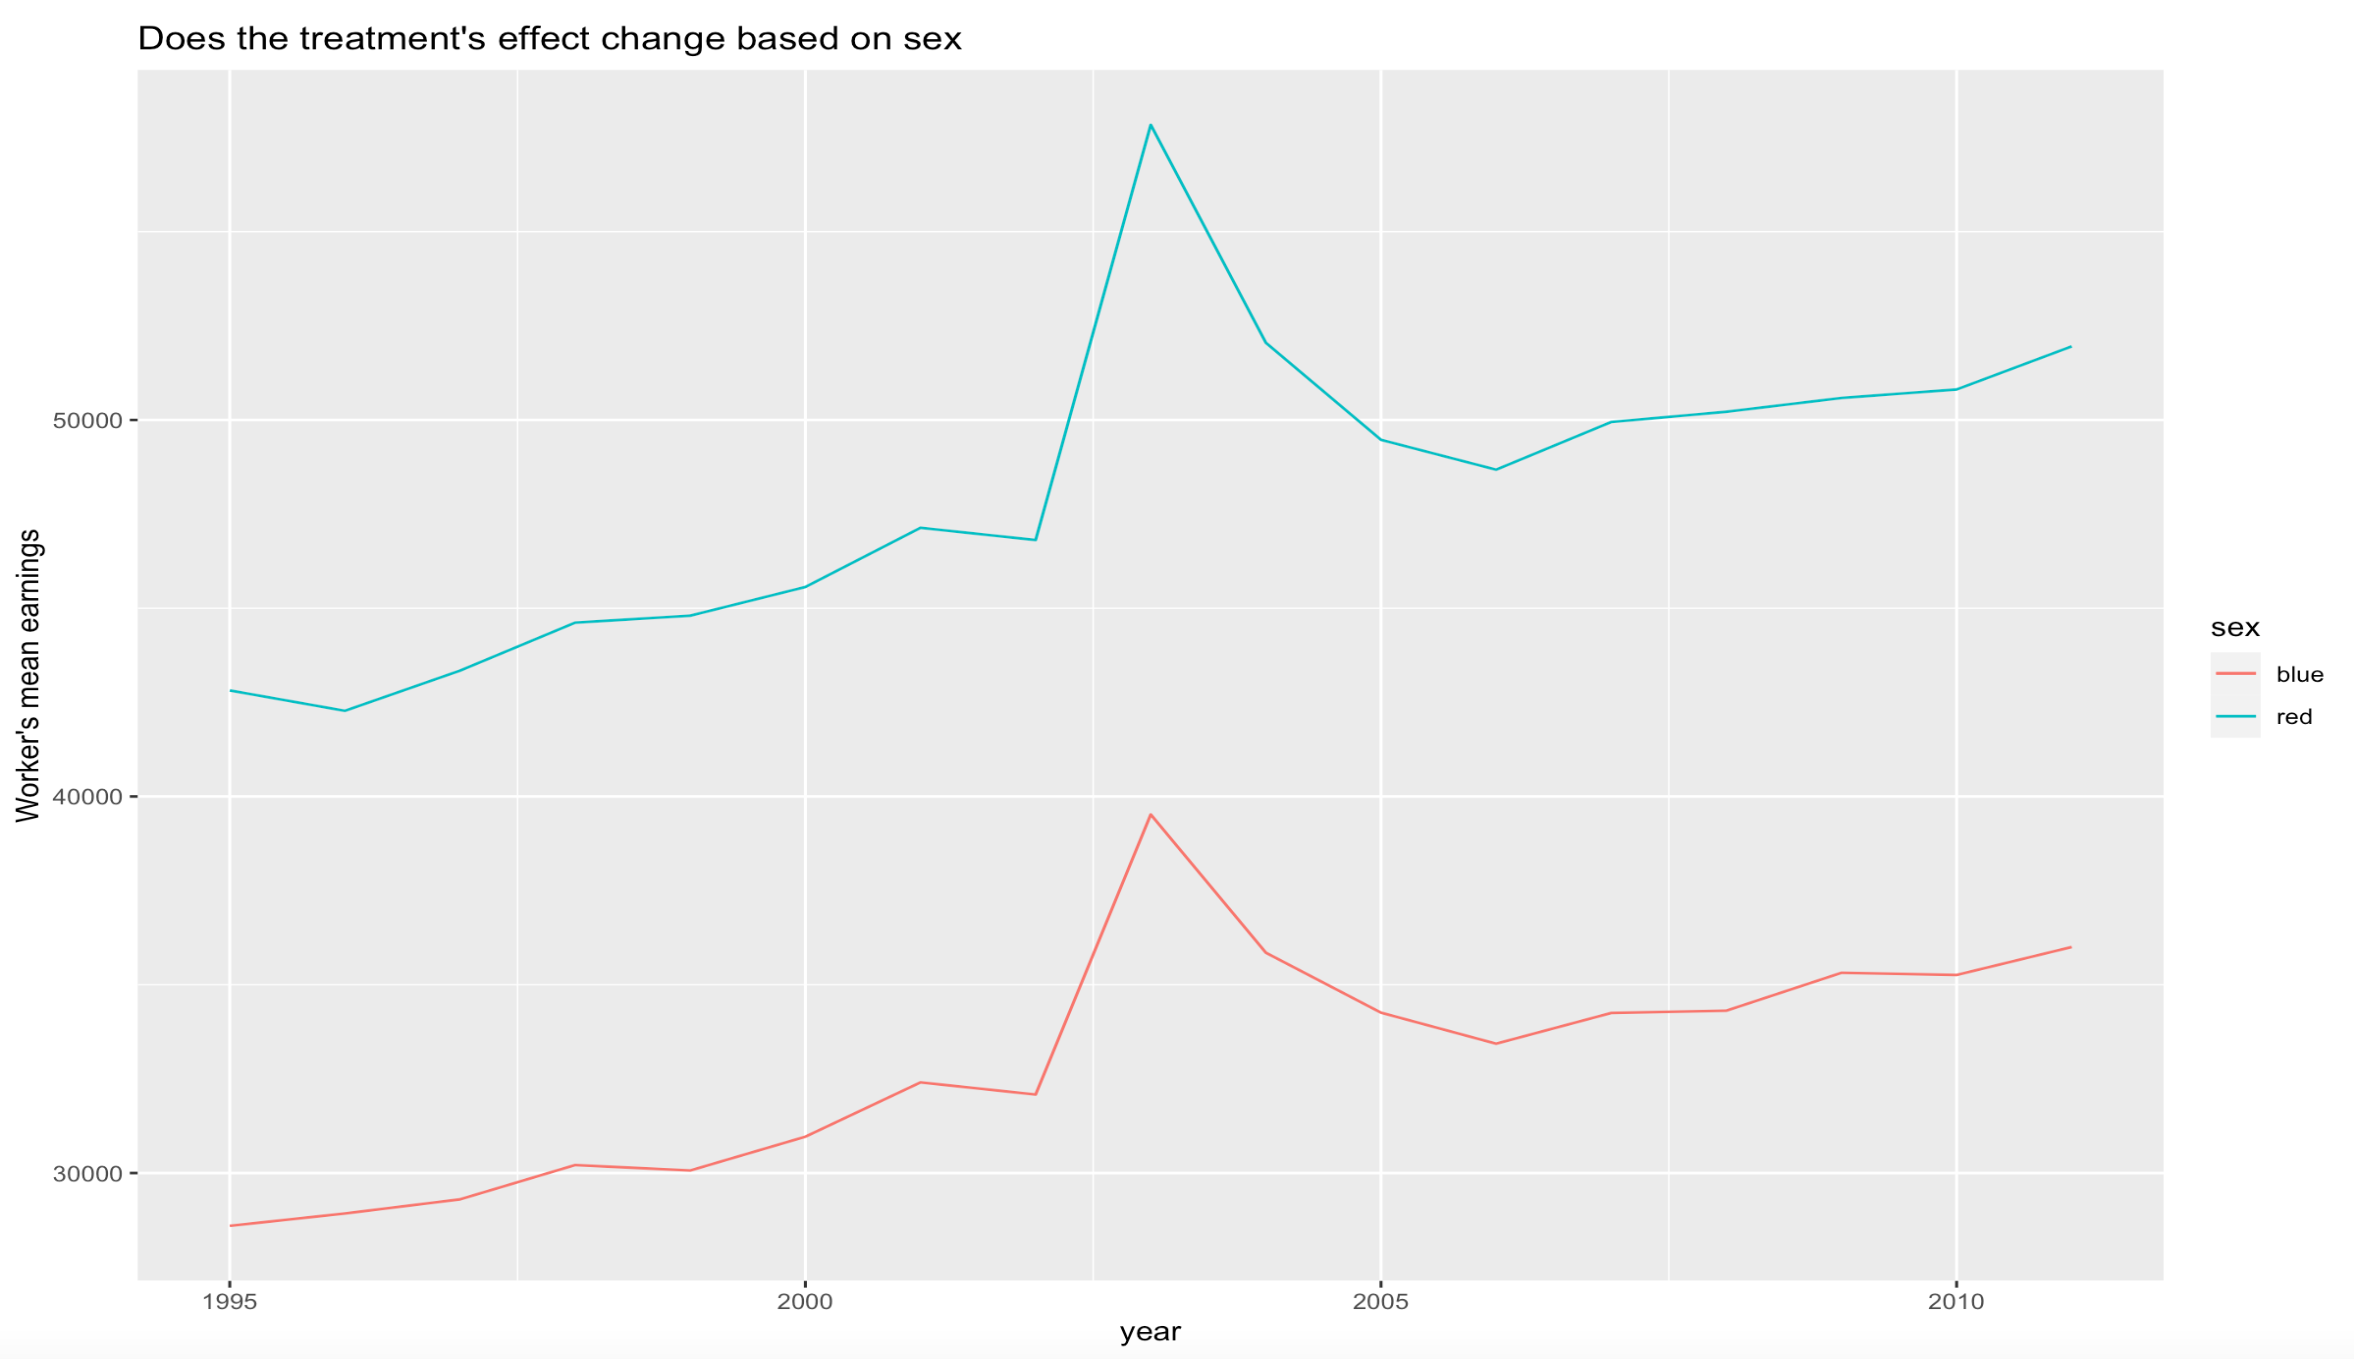

The first step should be preparing the data by generating variables for group analysis.

In [ ]:
fake_data2 <- fake_data %>% 
  group_by(variable_name, variable_name, variable_name) %>% 
  summarise(meanearnings = x))
  

fake_data2 <- fake_data2 %>% 
    mutate(variable_name = case_when(
        sex == , 
        sex == )) 

In [ ]:
plot1 <- ggplot(data = filter(dataset, variable_name == ),  
                aes(x = ),
                ) 

plot1 <- plot1+ geom_line(data = filter(dataset, variable_name == , variable_name == 1),aes( y = ,
                    color =  
                ),
                ) 

plot1 <- plot1+ geom_line(data = filter(dataset, variable_name == , variable_name == 0),aes( y = , 
                    color =  
                ),
                ) 

plot1 <- plot1 + labs(x = , 
                    y = ,
                    color = ,
                    title = )
plot1

## Exercise 2

Sometimes the mean can be deceptive.Create the same graph as question 1 using the median earnings rather than mean earnings.The graph should look like the image below.

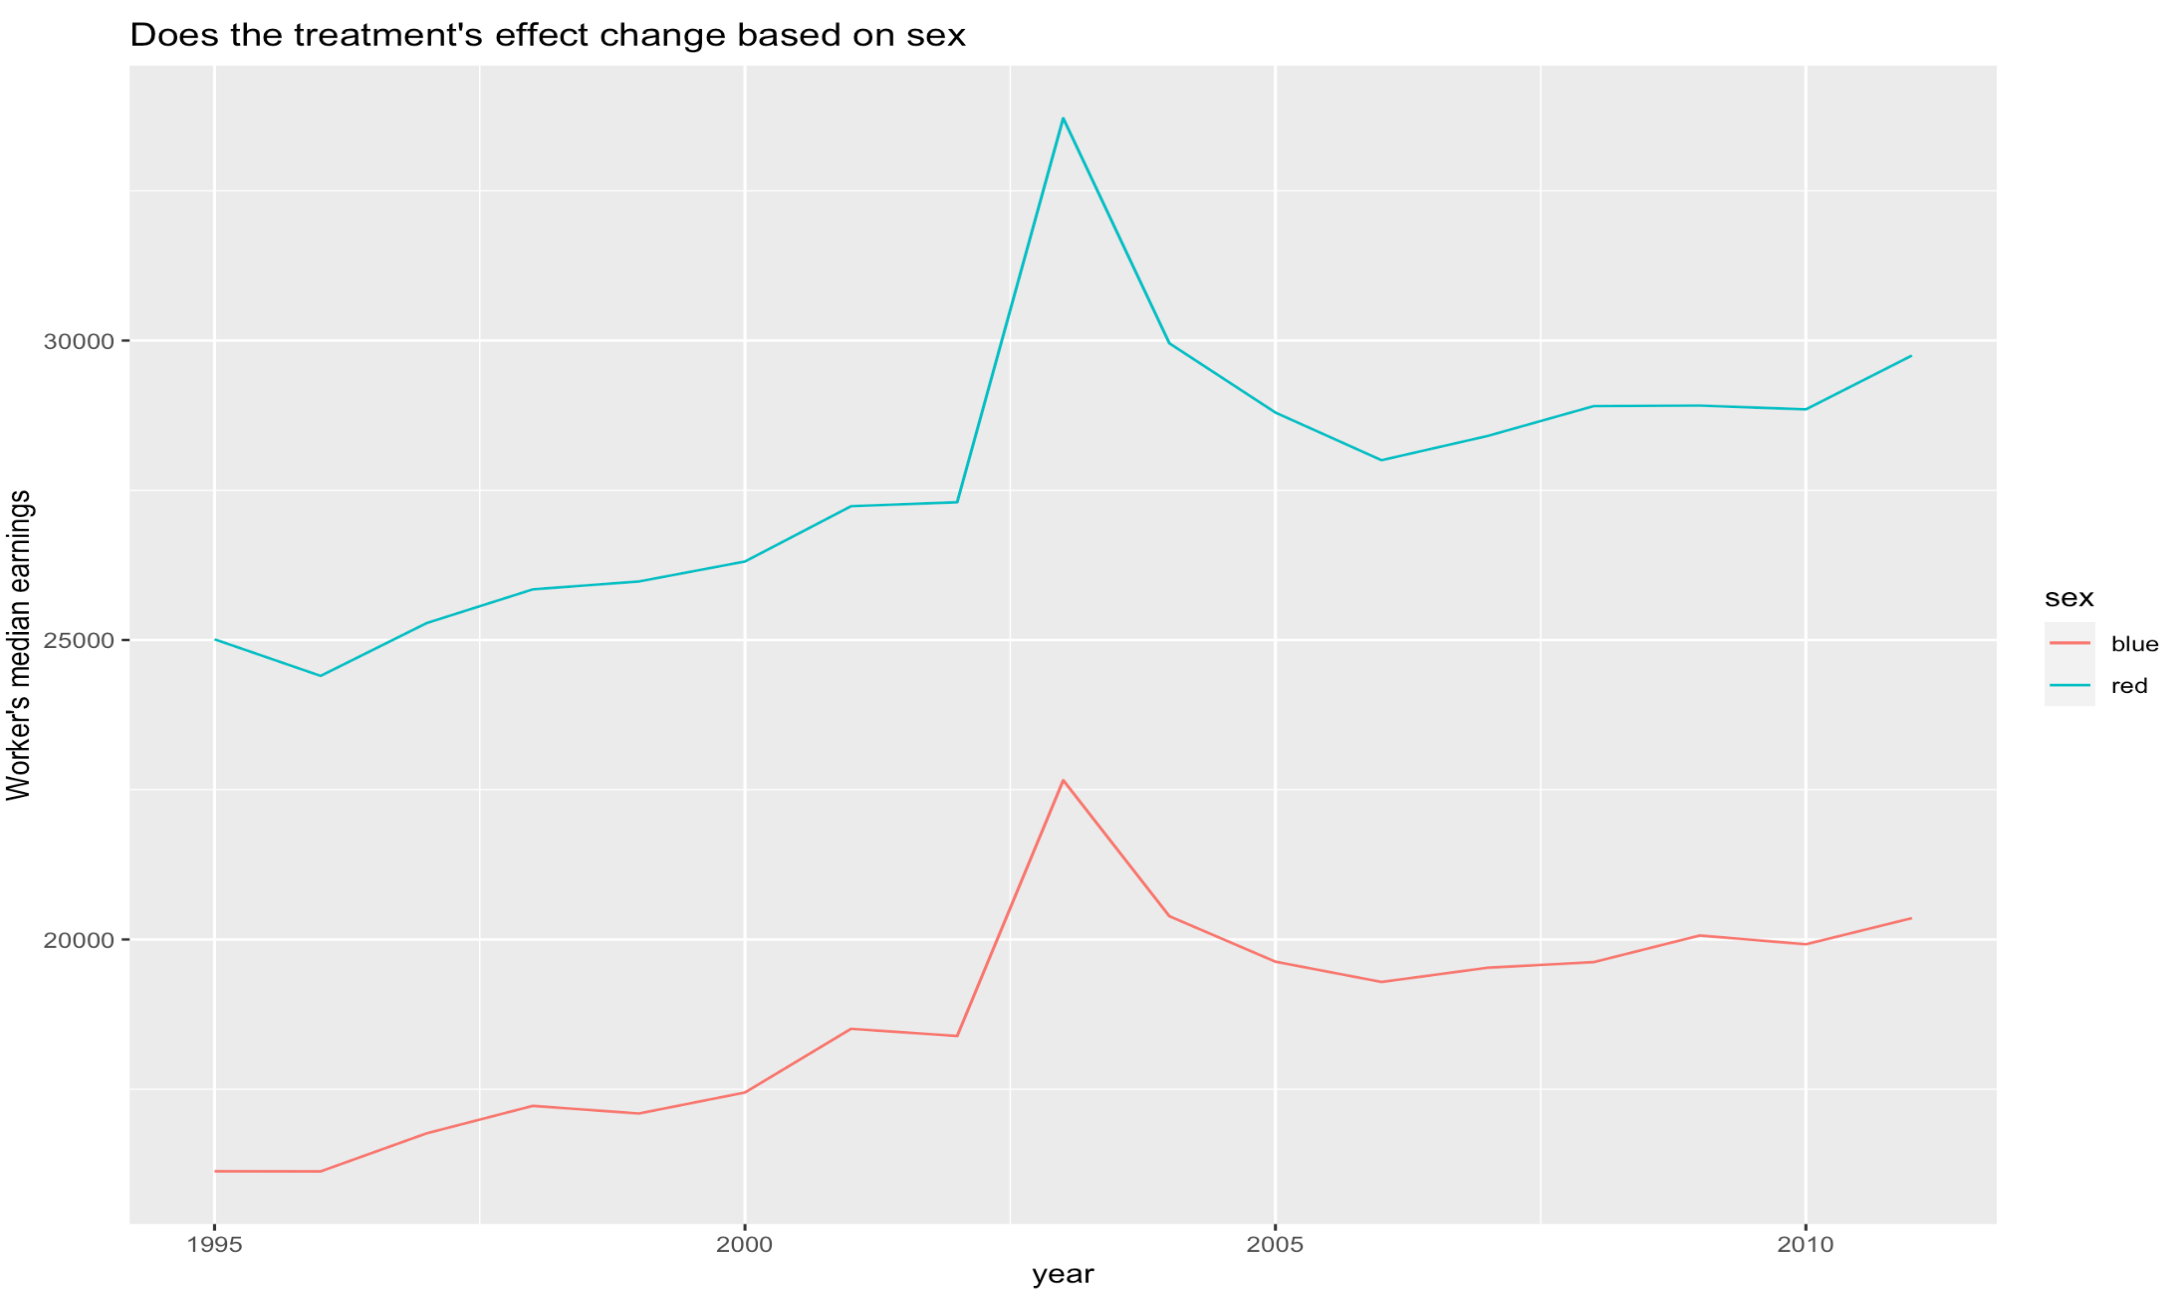

In [ ]:
fake_data3 <- fake_data %>% 
  group_by(variable_name, variable_name, variable_name) %>% 
  summarise(medianearnings = x))
  

fake_data3 <- fake_data2 %>% 
    mutate(variable_name = case_when(
        sex == , 
        sex == )) 

plot2 <- ggplot(data = filter(dataset, variable_name == ),  
                aes(x = ),
                ) 

plot2 <- plot1+ geom_line(data = filter(dataset, variable_name == , variable_name == 1),aes( 
                ),
                ) 

plot2 <- plot1+ geom_line(data = filter(dataset, variable_name == , variable_name == 0),aes( 
                ),
                ) 

plot2 <- plot1 + labs(x = , 
                    y = ,
                    color = ,
                    title = )
plot2

## Exercise 3

Show another way we can visualize how the treatment's effect on earnings changes based on sex. Specically, recreate the graph shown below.

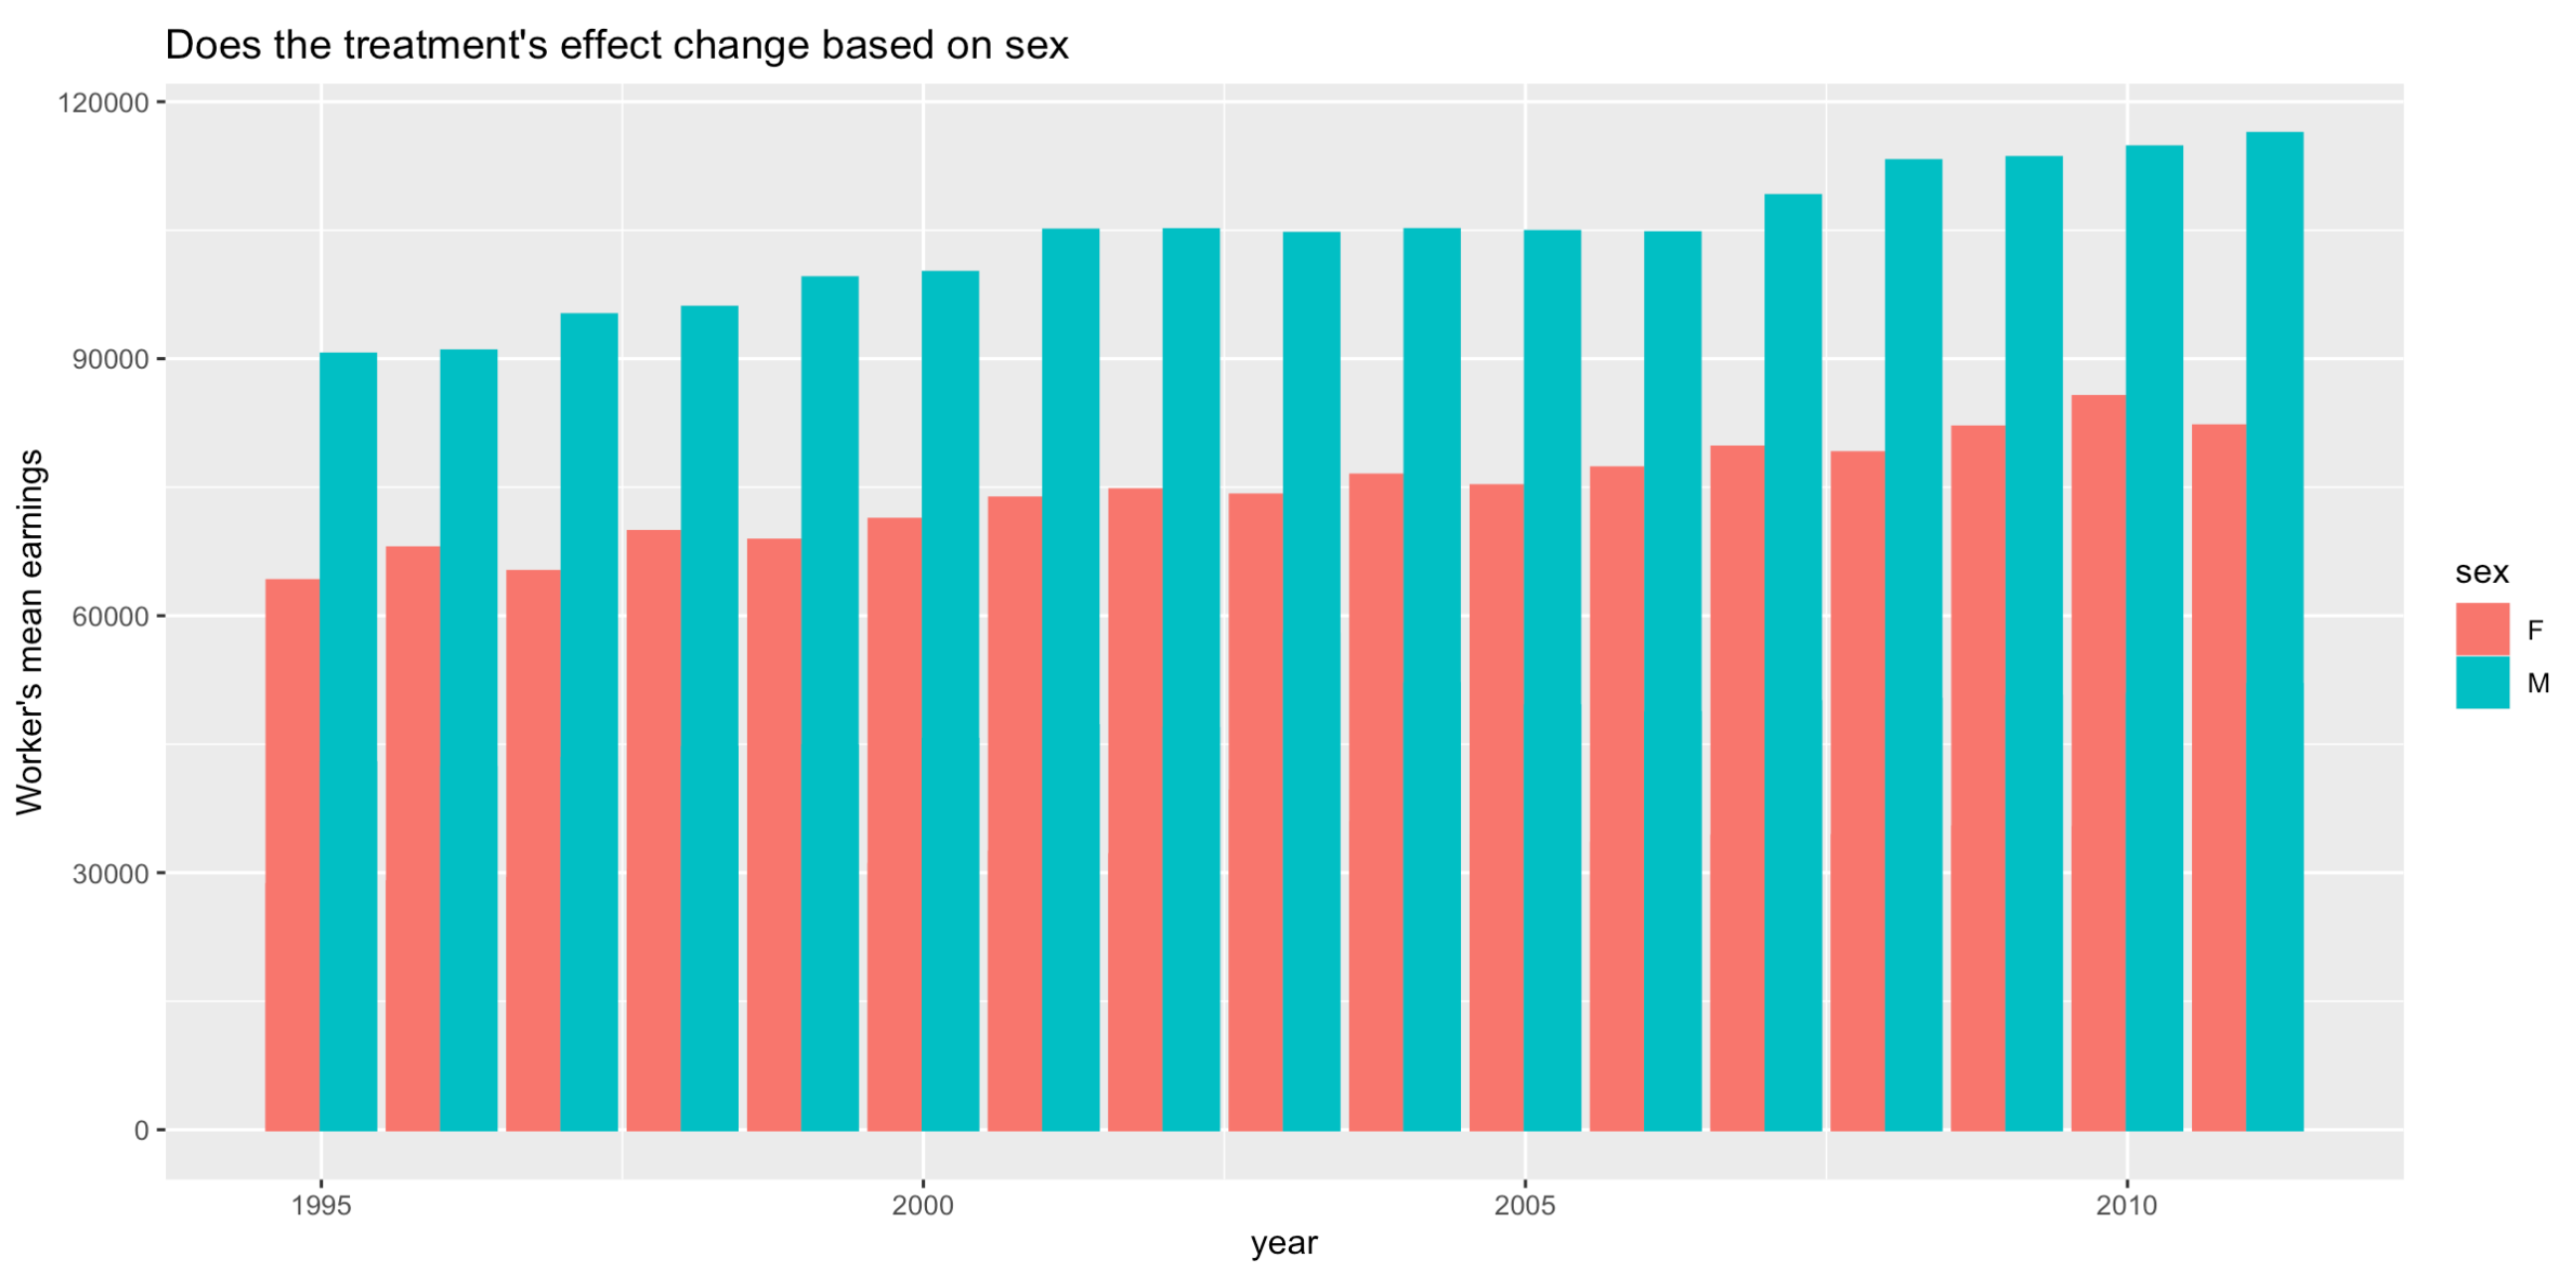

In [ ]:
fake_data4 <- fake_data %>% 
   group_by(variable_name, variable_name) %>% 
  summarise(meanearnings = x))

plot3 <- ggplot(data = fake_data4,  
                aes( 
                   
                ),
                ) 

plot3 <- plot3 + labs()

plot3 + geom_col(position = ) 
plot3

## Exercise 4

Recreate the graph shown below.

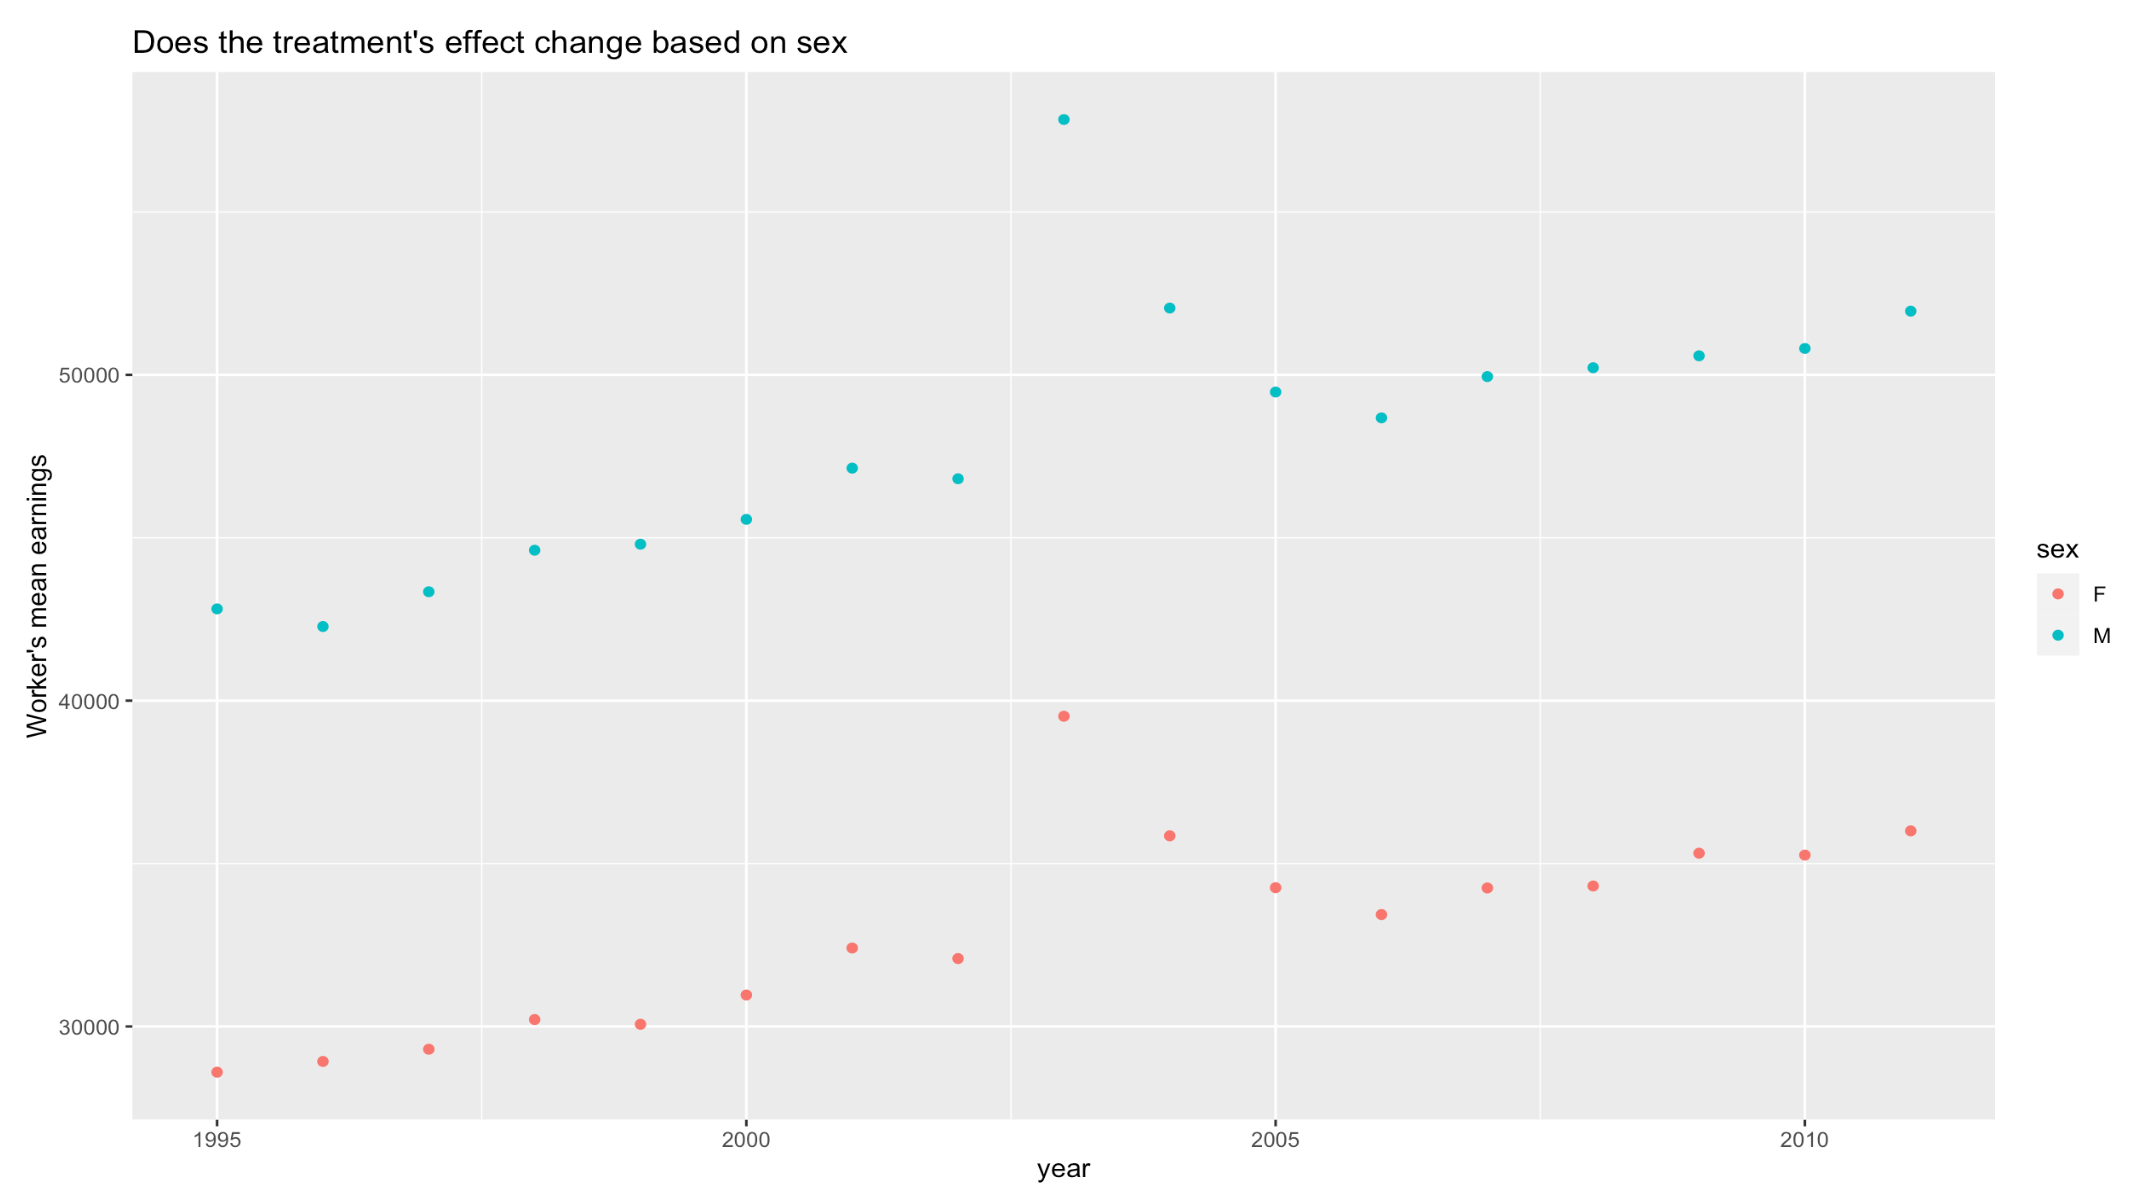

In [ ]:
plot4 <- ggplot(data = filter(fake_data2, ),  
                aes(x = , 
                    y = ,
                    color = ),
                ) 

plot4 <- plot4+ geom_point( ) 

plot4 <- plot4 + labs(x = , 
                    y = ,
                    color = ,
                    title = )
plot4

## 9.5 Wrap Up

We have learned in this module how to create different types of graphs using the command `ggplot()` and how to adjust them with the multiple options this command has. However, the most valuable lesson form this module is understanding when to use a specific type of graph. Graphs are only able to illustrate a story if we use them wisely and with strategically chosen options. Remember to check the R documentation when creating graphs. It may become your best friend. A wide range of graphs, with example code, can be found in [The R Graph Gallery website](https://r-graph-gallery.com/index.html). The geometries we have seen in this module are summarized below.

|Function| Description|
|--------|------------|
|`geom_point` | It creates a scatterplot.|
|`geom_line` | It creates a line plot. |
|`geom_hist` | It creates a histogram.|
|`geom_col` | It creates a bar plot. |

## 9.6 Advanced: maps
R has the best packages to easily create really complex maps. Maps can be an incredibly valuable part of a research project. With them, we can demonstrate geographical, social, and political features of a particular place. For example, we can show elevation and temperature changes of a country. We can also show how population density or income changes throughout a region. During the 2020 USA presidential campaign, CNN showed a map of the United States divided by counties colored red, blue or white depending on what party the majority of the county voted for. That same map can be created using some very simple commands in R!

Let's start by creating a world map. We can use the data set "world", since it is provided within one of the packages we installed earlier. It includes the coordinates and names of all countries. We can also map a particular country or region with the command `filter`. To make the filling color a little bit transparent, we use the option `alpha`: `alpha=1` means that the color is not transparent at all, while `alpha=0` means that it is fully transparent.

In [ ]:
# Map of the world
World <- map_data("world")
         ggplot() +
         geom_polygon(data = World, aes(x=long, y = lat, group = group), fill="deepskyblue", alpha=0.5)

In [ ]:
# Map of Peru
Peru <- map_data("world") %>% filter(region=="Peru") # filtering the data to only use Peru 
  ggplot() +
  geom_polygon(data = Peru, aes(x=long, y = lat, group = group), fill="red", alpha=0.6) +
  coord_fixed(1)   # setting the transparency of the chart with alpha

Let us continue using the Peru example. Imagine we wanted to show the population of the 10 largest cities in Peru. Below we create a dataframe containing information on coordinates, name, and population of the 10 largest cities in Peru.

In [ ]:
# Set a vector of names
city <- c("Lima", "Arequipa", "Trujillo",  "Chiclayo", "Piura", "Chimbote", "Huancayo", "Cuzco", "Iquitos", "Pucallpa")

# Create two vectors of coordinates
lat <- c(-12.0464, -16.4090, -8.1060, -6.7701, -5.1783, -9.0633, -12.0686, -13.5320, -3.7437, -8.3929)
long <- c(-77.0428, -71.5375, -79.0330, -79.8550, -80.6549, -78.5890, -75.2103, -71.9675, -73.2516, -74.5826)

# Add a vector of population
population <- c(9751717, 1008290, 891000, 552508, 484475, 371012, 456250, 428450, 483870, 326040)

# Create and show the dataframe
data <- data.frame(city, lat, long, population)
data

Now we are ready to display this information in a map. We show Peruvian land using `geom_polygon` and a point for each Peruvian city with `geom_point`. The size of each point will be proportional to the population of that city. To do so, we add the option `size=population`. We set the size of the city points to range between 8 and 13 with the option `scale_size_continuous(range=c(8, 13))`.

We add a text to each point with `geom_text`. This text will show the name of the city (`data$city`), followed by a column and the size of the city with a comma separator (`as.character(format(data$population, big.mark=","))`).
Finally, we suppress the legen with `theme(legend.position = 'none')`.

In [ ]:
Peru <- map_data("world") %>% filter(region=="Peru") 
      ggplot() +
      geom_polygon(data = Peru, aes(x=long, y = lat, group = group), fill="deepskyblue", alpha=0.7) + 
      geom_point(data=data, aes(x=long, y=lat, size=population,),  color="mediumblue",  alpha=0.6)+ # ddding the points showing population size 
      scale_size_continuous(range=c(8, 13)) + # choosing the size range of the population points 
      geom_text(data = data, label=paste0(data$city, ":", as.character(format(data$population, big.mark=","))), aes(x=long, y=lat), hjust=0.5, vjust=-2.7, fontface='bold', size=3) +
      theme(legend.position = 'none')+ # no legend
      ggtitle("The biggest cities in Peru by population of urban unit") + 
      theme(plot.title = element_text(lineheight=1, face="bold")) # creating the title of the map 

## References

- [The details of ggplot](https://www.youtube.com/watch?v=h29g21z0a68)